In [1]:
# load library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

r4d1 = pd.read_csv('island-data-bottle-round-4/prices_round_4_day_1.csv',sep = ';')
r4d2 = pd.read_csv('island-data-bottle-round-4/prices_round_4_day_2.csv',sep = ';')
r4d3 = pd.read_csv('island-data-bottle-round-4/prices_round_4_day_3.csv',sep = ';')

def update_timestamp(df):
    df['timestamp'] = df['day']*100*10000+df['timestamp']
    df.drop(['day'],axis=1,inplace=True)
    return df.copy()

r4d1 =  update_timestamp(r4d1)
r4d2 =  update_timestamp(r4d2)
r4d3 =  update_timestamp(r4d3)

r4  =  pd.concat([r4d1,r4d2,r4d3],axis=0).reset_index(drop=True)

In [2]:
def plot_orderbook_dist(df,ticker):
    plt.plot(df[df['product']==ticker]['bid_volume_1'],df[df['product']==ticker]['ask_volume_1'],'.')
    plt.title(ticker+' orderbook best bid and ask volume scatter')
    plt.xlabel('bid_volume_1')
    plt.ylabel('ask_volume_1')
    plt.show()
    return 

def plot_mid_price(df,ticker_1,ticker_2):
    df['mid_price'] = (df['bid_price_1']+df['ask_price_1'])/2
    fig,ax1 = plt.subplots(figsize=(12,9))
    ax1.plot(df[df['product']==ticker_1]['timestamp'],df[df['product']==ticker_1]['mid_price'],'darkblue')
    ax1.axhline(y = df[df['product']==ticker_1]['mid_price'].median(), color = 'r', linestyle = '--'
                ,label = 'median mid price of %s : %s'%(ticker_1,df[df['product']==ticker_1]['mid_price'].median()))
    ax1.legend()
    ax1.set_xlabel('time')
    ax1.set_ylabel(ticker_1+' mid price',color='b')
    ax1.tick_params('y',colors='b')
    if ticker_1 =='BERRIES':
        # plot vertical lines when timestamp = 500*1000
        ax1.axvline(x = 250*1000, color = 'g')
        ax1.axvline(x=500*1000, color='r', linestyle='--')
        ax1.axvline(x=750*1000, color='g', linestyle='--')
        ax1.axvline(x=1000*1000, color='r', linestyle='--')
        ax1.axvline(x=1250*1000, color='g', linestyle='--')
        ax1.axvline(x=1500*1000, color='r', linestyle='--')
        ax1.axvline(x=1750*1000, color='g', linestyle='--')
        ax1.axvline(x=2000*1000, color='r', linestyle='--')
        ax1.axvline(x=2250*1000, color='g', linestyle='--')
        ax1.axvline(x=2500*1000, color='r', linestyle='--')
        ax1.axvline(x=2750*1000, color='g', linestyle='--')
        return 
    if ticker_2 == None:
        plt.show()
        return
    else:
        ax2 = ax1.twinx()
        ax2.plot(df[df['product']==ticker_2]['timestamp'],df[df['product']==ticker_2]['mid_price'],'green')
        ax2.set_ylabel(ticker_2+' mid price',color='g')
        ax2.tick_params('y',colors='g')

        fig.tight_layout()
        plt.show()
        return

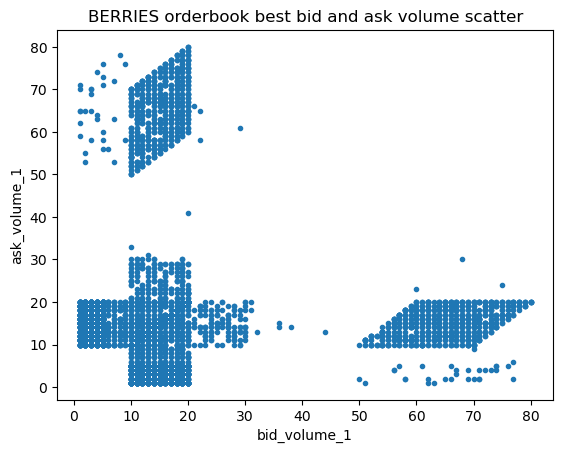

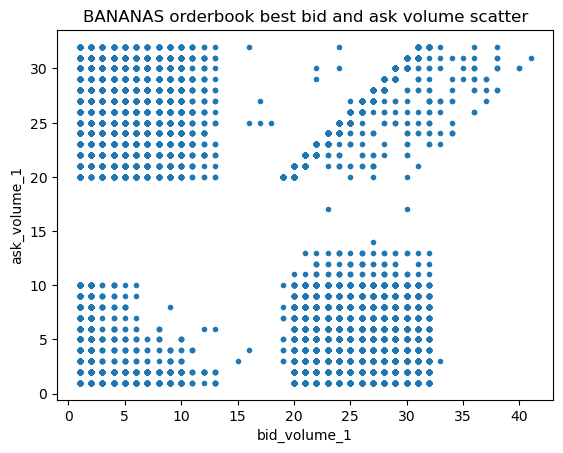

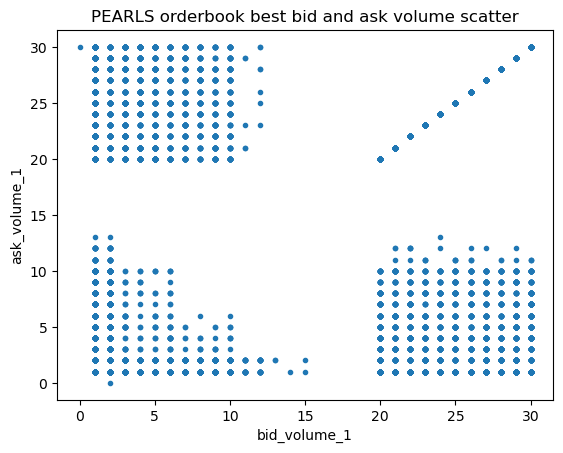

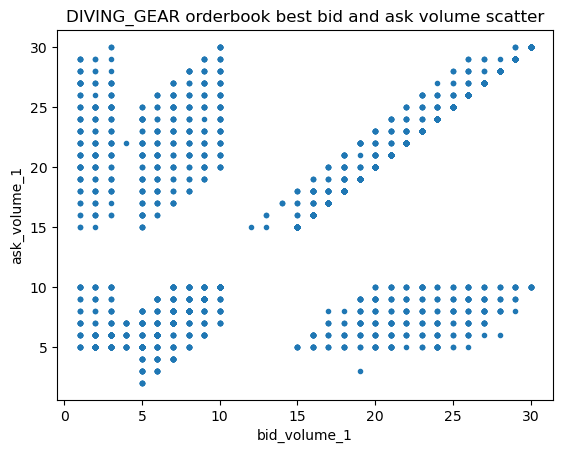

In [3]:
r4.pipe(plot_orderbook_dist,ticker='BERRIES')
r4.pipe(plot_orderbook_dist,ticker='BANANAS')
r4.pipe(plot_orderbook_dist,ticker='PEARLS')
r4.pipe(plot_orderbook_dist,ticker='DIVING_GEAR')

## EDA for our new products

### From tropical TV

A tropical picnic consist of 
- 2 baguettes
- 4 dips
- 1 ukulele

= 1 exact pinic basket

### From the IMC wiki page
#### Algorithm challenge

Picnics are all the rage at the moment in the Archipelago, likely owing to the splendid weather. Everyone’s favorite PICNIC_BASKET is now a tradable product. This classy picnic basket contains three things:

1. a BAGUETTE
2. a nice DIP 
3. a UKULELE for the music
4. a PICNIC_BASKET containing all three

All four of the above products can now also be traded on the island exchange. Are the picnic baskets a bit expensive for you taste? Then perhaps see if you can get the contents directly.

Position limits for the newly introduced products:

- BAGUETTE: 150
- DIP: 300
- UKULELE: 70
- PICNIC_BASKET: 70

In [4]:
baguette_mid = r4[r4['product']=='BAGUETTE']['mid_price'].reset_index(drop=True)
dip_mid = r4[r4['product']=='DIP']['mid_price'].reset_index(drop=True)
ukulele_mid = r4[r4['product']=='UKULELE']['mid_price'].reset_index(drop=True)

picnic_basket = r4[r4['product']=='PICNIC_BASKET']['mid_price'].reset_index(drop=True)

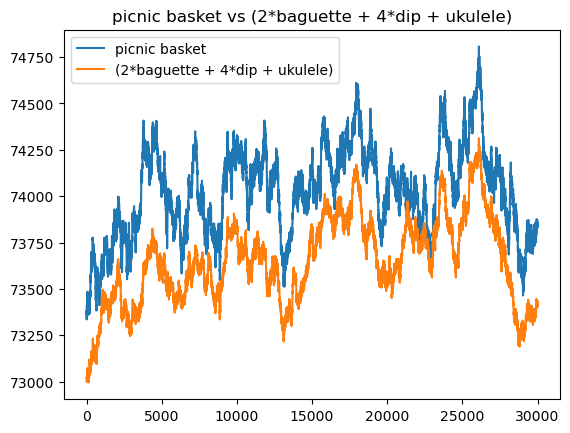

In [5]:
# 1 picnic basket = 2 baguette + 4 dip + 1 ukulele
plt.plot(picnic_basket,label='picnic basket')
plt.plot(2*baguette_mid+4*dip_mid+ukulele_mid,label='(2*baguette + 4*dip + ukulele)')
plt.title('picnic basket vs (2*baguette + 4*dip + ukulele)')
plt.legend()
plt.show()


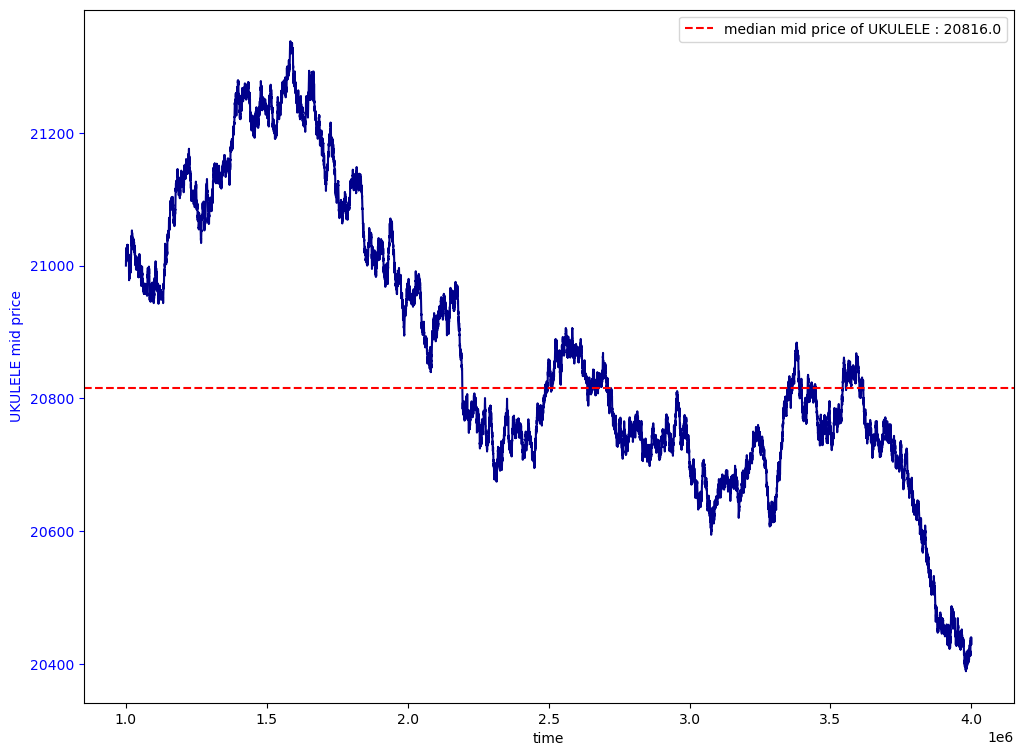

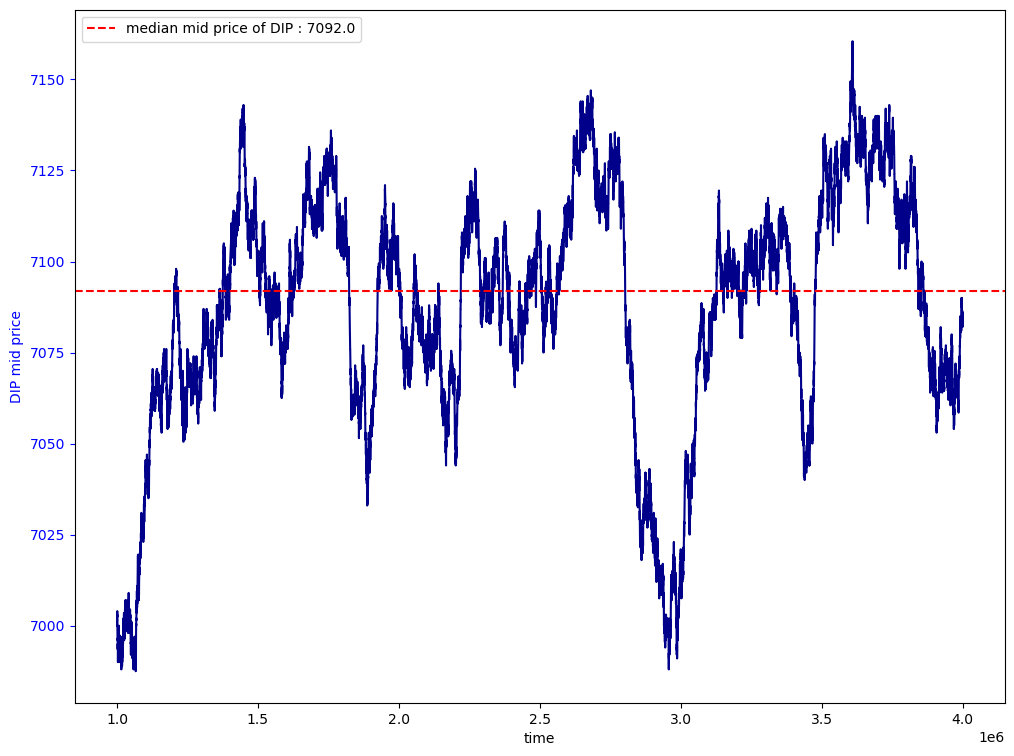

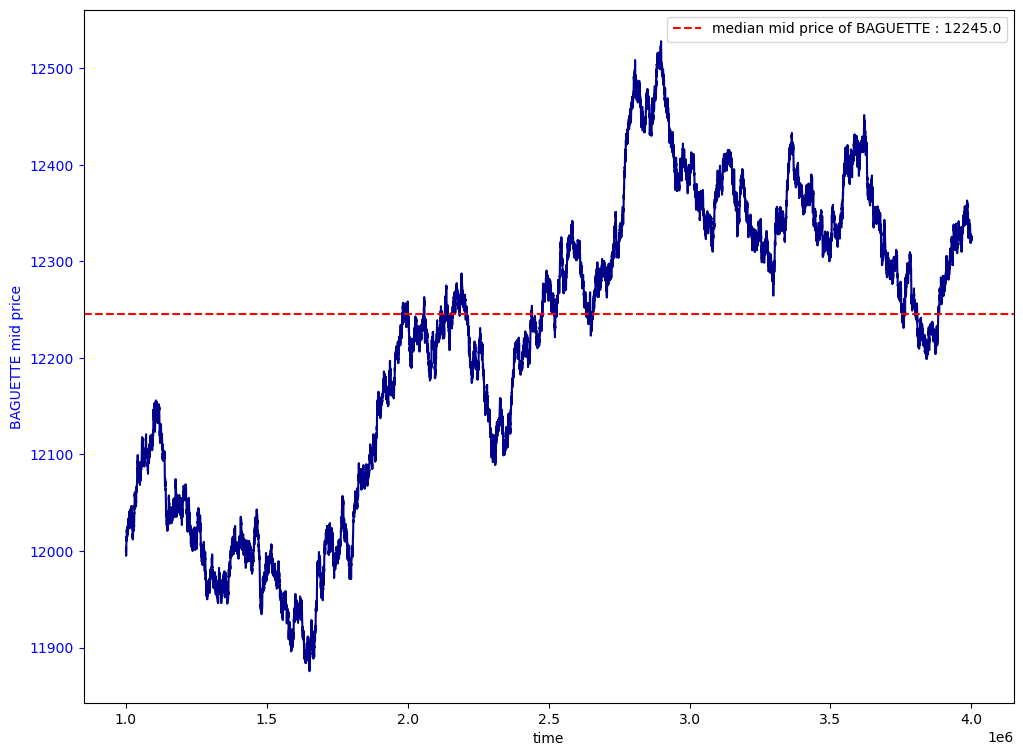

In [6]:
r4.pipe(plot_mid_price,'UKULELE',None)
r4.pipe(plot_mid_price,'DIP',None)
r4.pipe(plot_mid_price,'BAGUETTE',None)

We can see there is a consistent premium between the picnic basket and the linear combination of the ingredients of it.

the +-1 MAD of the premium is:  98.48588344999993


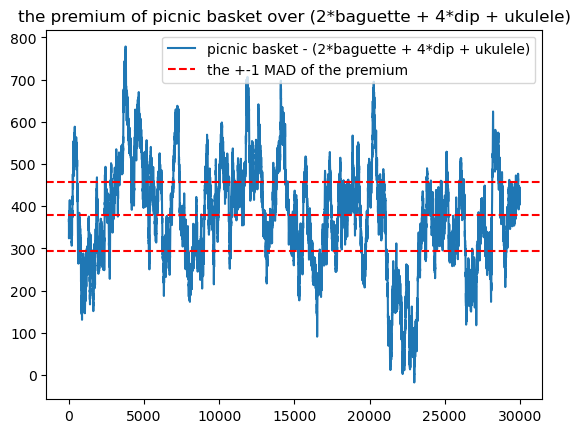

In [15]:
plt.plot(picnic_basket-(2*baguette_mid+4*dip_mid+ukulele_mid), label = 'picnic basket - (2*baguette + 4*dip + ukulele)')
plt.title('the premium of picnic basket over (2*baguette + 4*dip + ukulele)')
plt.axhline(y=(picnic_basket-(2*baguette_mid+4*dip_mid+ukulele_mid)).median(), color='r', linestyle='--')


# # plot +-1 MAD of the premium
# plt.axhline(y=(picnic_basket-(2*baguette_mid+4*dip_mid+ukulele_mid)).median()+(picnic_basket-(2*baguette_mid+4*dip_mid+ukulele_mid)).mad(), color='r', linestyle='--')
# plt.axhline(y=(picnic_basket-(2*baguette_mid+4*dip_mid+ukulele_mid)).median()-(picnic_basket-(2*baguette_mid+4*dip_mid+ukulele_mid)).mad(), color='r', linestyle='--')

plt.axhline(y = 294, color = 'r', linestyle = '--',label = 'the +-1 MAD of the premium')
plt.axhline(y = 458, color = 'r', linestyle = '--')
# print the +-1 MAD of the premium
print('the +-1 MAD of the premium is: ',(picnic_basket-(2*baguette_mid+4*dip_mid+ukulele_mid)).mad())
plt.legend()
plt.show()

the median of the premium is:  379.0
the 33% percentile of the premium is:  325.5
the 66% percentile of the premium is:  431.0


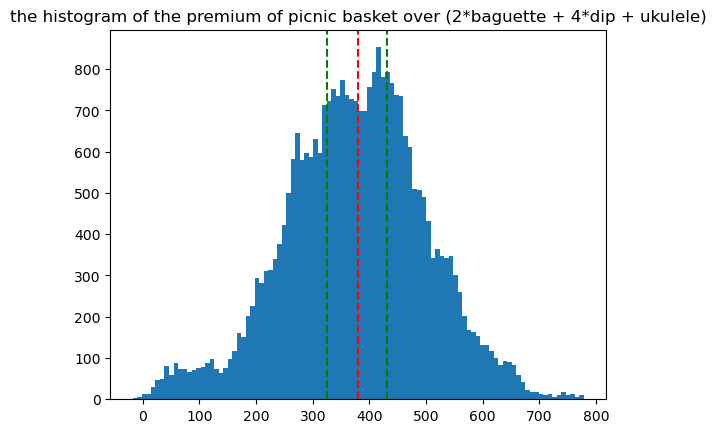

In [17]:
plt.hist(picnic_basket-(2*baguette_mid+4*dip_mid+ukulele_mid),bins=100)
plt.title('the histogram of the premium of picnic basket over (2*baguette + 4*dip + ukulele)')
plt.axvline(x=(picnic_basket-(2*baguette_mid+4*dip_mid+ukulele_mid)).median(), color='r', linestyle='--')
print('the median of the premium is: ',(picnic_basket-(2*baguette_mid+4*dip_mid+ukulele_mid)).median())
# plot the 25% and 75% percentile of the premium
plt.axvline(x=(picnic_basket-(2*baguette_mid+4*dip_mid+ukulele_mid)).quantile(1/3), color='g', linestyle='--')
plt.axvline(x=(picnic_basket-(2*baguette_mid+4*dip_mid+ukulele_mid)).quantile(2/3), color='g', linestyle='--')
# print the 25% and 75% percentile of the premium
print('the 33% percentile of the premium is: ',(picnic_basket-(2*baguette_mid+4*dip_mid+ukulele_mid)).quantile(1/3))
print('the 66% percentile of the premium is: ',(picnic_basket-(2*baguette_mid+4*dip_mid+ukulele_mid)).quantile(2/3))
plt.show()

what if we traded not exactly 4;2:1 but based on the position limit information?
- 150:300:70:70


If MM strategy works for the single underlying?

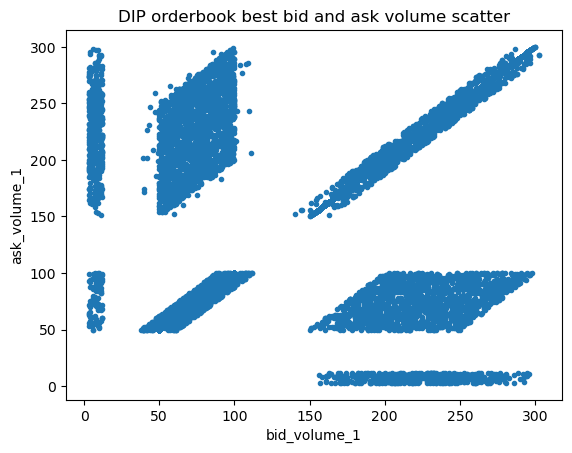

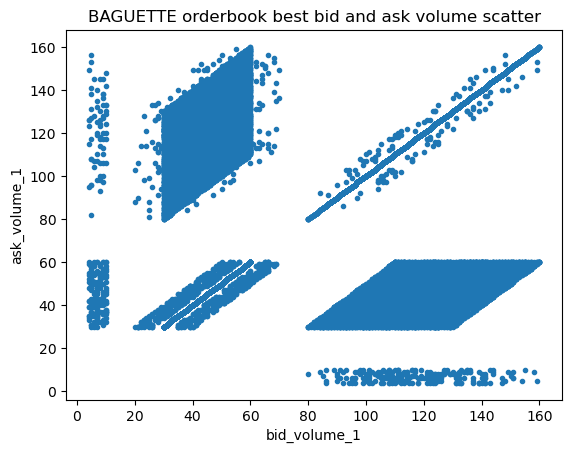

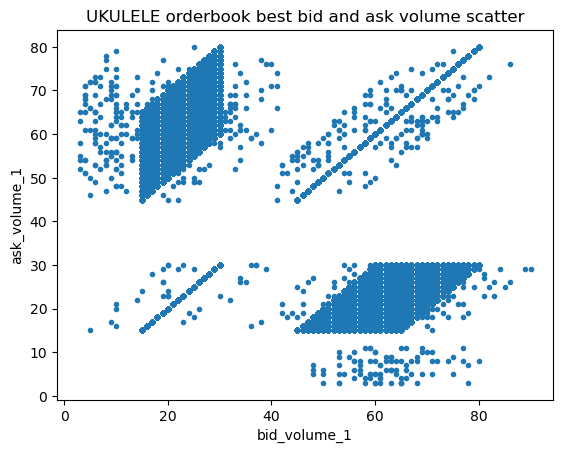

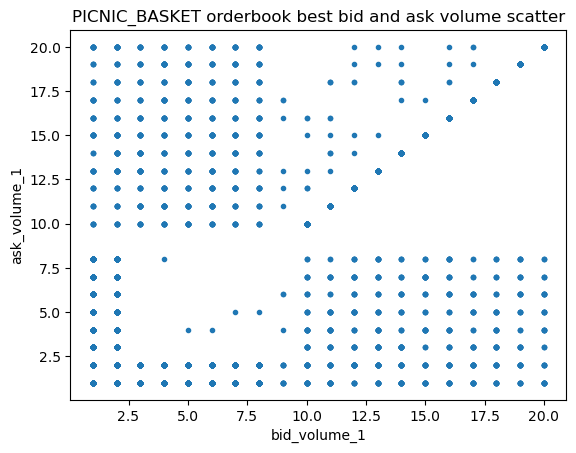

In [27]:
r4.pipe(plot_orderbook_dist,ticker='DIP')
r4.pipe(plot_orderbook_dist,ticker='BAGUETTE')
r4.pipe(plot_orderbook_dist,ticker='UKULELE')
r4.pipe(plot_orderbook_dist,ticker='PICNIC_BASKET')

In [28]:
def plot_spread_dist(df,ticker):
    df = df[df['product']==ticker]
    df['spread'] = df['ask_price_1'] - df['bid_price_1']
    df['spread'].plot.hist(bins=10)
    plt.title(ticker+' spread distribution')
    plt.axvline(x=df['spread'].median(), color='r', linestyle='--')
    plt.axvline(x=df['spread'].median()+df['spread'].mad(), color='g', linestyle='--')
    plt.axvline(x=df['spread'].median()-df['spread'].mad(), color='g', linestyle='--')
    plt.show()
    return

/var/folders/h1/ht0zd4tn5qg468lkx_3tsd8w0000gn/T/ipykernel_6354/4031805879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spread'] = df['ask_price_1'] - df['bid_price_1']


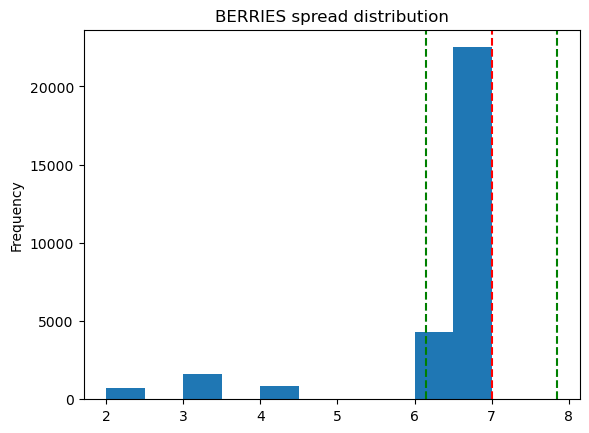

/var/folders/h1/ht0zd4tn5qg468lkx_3tsd8w0000gn/T/ipykernel_6354/4031805879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spread'] = df['ask_price_1'] - df['bid_price_1']


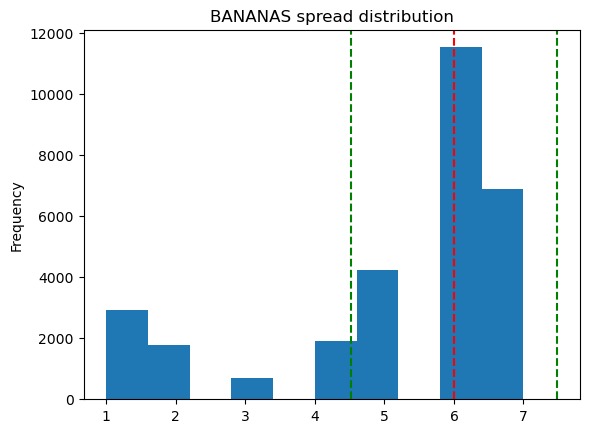

/var/folders/h1/ht0zd4tn5qg468lkx_3tsd8w0000gn/T/ipykernel_6354/4031805879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spread'] = df['ask_price_1'] - df['bid_price_1']


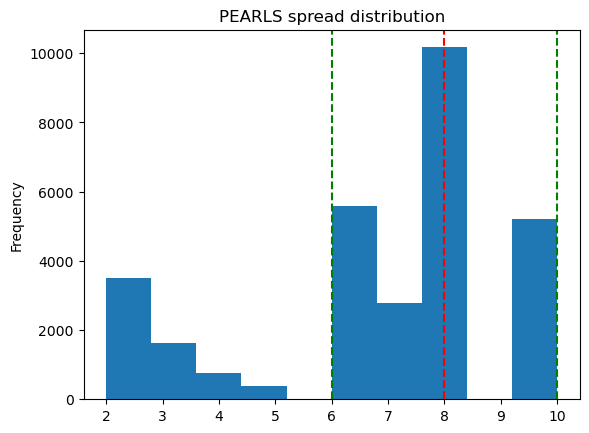

/var/folders/h1/ht0zd4tn5qg468lkx_3tsd8w0000gn/T/ipykernel_6354/4031805879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spread'] = df['ask_price_1'] - df['bid_price_1']


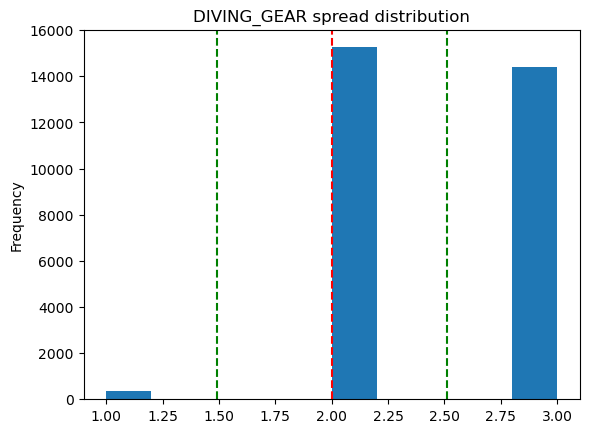

/var/folders/h1/ht0zd4tn5qg468lkx_3tsd8w0000gn/T/ipykernel_6354/4031805879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spread'] = df['ask_price_1'] - df['bid_price_1']


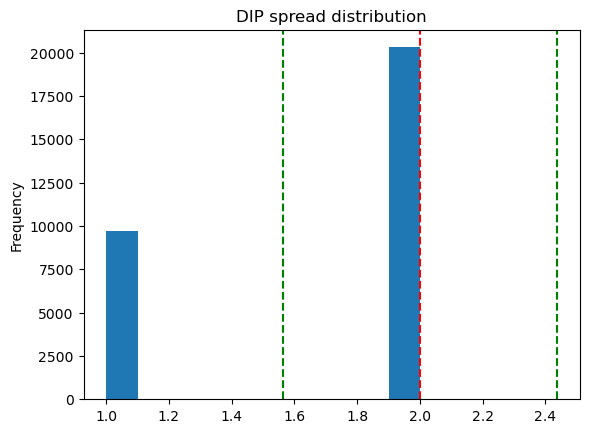

/var/folders/h1/ht0zd4tn5qg468lkx_3tsd8w0000gn/T/ipykernel_6354/4031805879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spread'] = df['ask_price_1'] - df['bid_price_1']


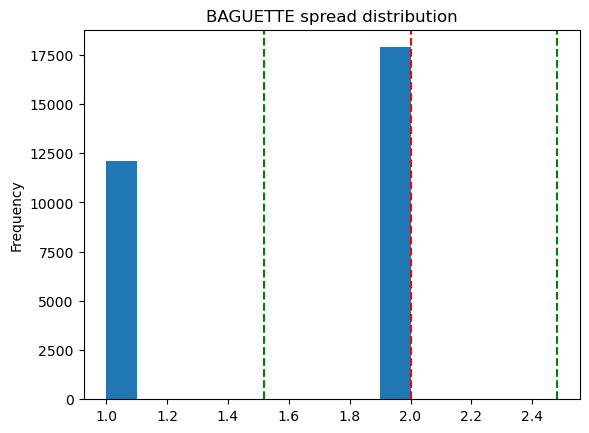

/var/folders/h1/ht0zd4tn5qg468lkx_3tsd8w0000gn/T/ipykernel_6354/4031805879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spread'] = df['ask_price_1'] - df['bid_price_1']


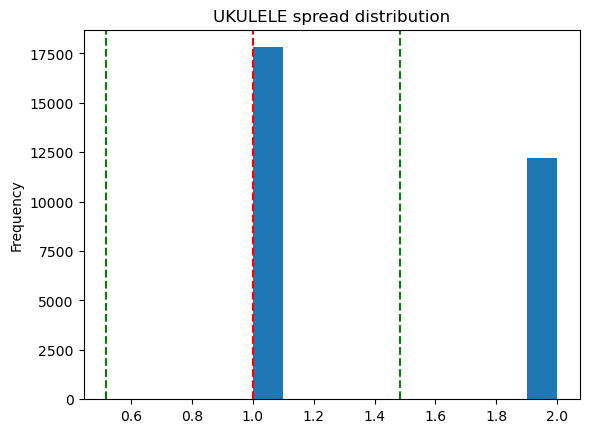

/var/folders/h1/ht0zd4tn5qg468lkx_3tsd8w0000gn/T/ipykernel_6354/4031805879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spread'] = df['ask_price_1'] - df['bid_price_1']


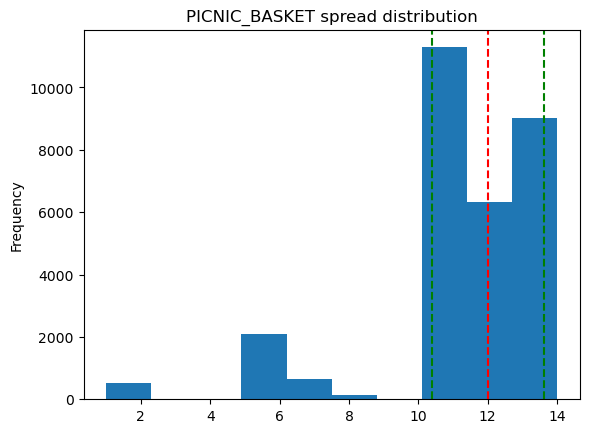

In [29]:
r4.pipe(plot_spread_dist,ticker='BERRIES')
r4.pipe(plot_spread_dist,ticker='BANANAS')
r4.pipe(plot_spread_dist,ticker='PEARLS')
r4.pipe(plot_spread_dist,ticker='DIVING_GEAR')

r4.pipe(plot_spread_dist,ticker='DIP')
r4.pipe(plot_spread_dist,ticker='BAGUETTE')
r4.pipe(plot_spread_dist,ticker='UKULELE')
r4.pipe(plot_spread_dist,ticker='PICNIC_BASKET')

We can see that the spreads of the 3 new ingredient are much narrower than the spread of the picnic basket. So Market making on these 3 ingredients should be less profitable.

This is because the picnic basket is a linear combination of the 3 ingredients. The spread of the picnic basket is the sum of the spread of the 3 ingredients. So we may find a way to ETF arbitrage on the picnic basket. But the naive MM strategy on each of theses ingredients seems not to be profitable in first place.